[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//incubodac/GradCamTP/blob/main/GradCam.ipynb)


# Introducción

La explicabilidad en redes neuronales convolucionales (CNN) ha surgido como un aspecto clave en el campo del reconocimiento de patrones, donde no solo interesa alcanzar un alto desempeño, sino también comprender qué información utiliza la red para tomar decisiones. Un primer avance fue **Class Activation Mapping (CAM, 2016)**, que permitió visualizar las regiones más relevantes de una imagen para la clasificación, aunque con la limitación de aplicarse únicamente a arquitecturas específicas con *global average pooling*. Más adelante, **Grad-CAM (2017)** amplió esta idea utilizando gradientes retropropagados, logrando un método versátil aplicable a una amplia variedad de arquitecturas y consolidándose como la técnica de referencia en explicabilidad. A partir de allí se desarrollaron extensiones como **Grad-CAM++ (2018)**, que mejora la localización en escenarios complejos, y **Score-CAM (2019)**, que evita depender directamente de los gradientes. Sin embargo, el salto conceptual decisivo que abrió la puerta al estudio moderno de la explicabilidad fue el de Grad-CAM.

---

## CAM

**Funcionamiento:**
CAM fue introducido por Zhou et al. (2016) y se basa en la utilización de una capa de *global average pooling (GAP)* antes de la capa final de clasificación. La idea es que los pesos de la capa de salida pueden emplearse para ponderar los mapas de activación de la última capa convolucional, generando así un mapa de calor que indica las regiones de la imagen más relevantes para una clase determinada.

**Fórmula principal:**

$$
M_c(x,y) = \sum_k w_k^c f_k(x,y)
$$

donde:

* $M_c(x,y)$ es el mapa de activación para la clase $c$,
* $f_k(x,y)$ es el mapa de activación de la característica $k$,
* $w_k^c$ es el peso asociado a la clase $c$ en la capa de salida.

**Limitación:** solo puede aplicarse a arquitecturas que incluyan GAP antes de la clasificación.

**Referencia:**
Zhou, B., Khosla, A., Lapedriza, A., Oliva, A., & Torralba, A. (2016). *Learning Deep Features for Discriminative Localization*. CVPR.

---

## Grad-CAM

**Aporte:**
Grad-CAM, propuesto por Selvaraju et al. (2017), generaliza la idea de CAM para que pueda aplicarse a una gran variedad de arquitecturas. Utiliza los gradientes de la clase de interés respecto a los mapas de activación de una capa convolucional, ponderando las características de acuerdo con su importancia para la predicción.

**Fórmula principal:**

1. Calcular los gradientes de la puntuación de la clase $y^c$ respecto a los mapas de activación $A^k$:

$$
\alpha_k^c = \frac{1}{Z} \sum_i \sum_j \frac{\partial y^c}{\partial A_{ij}^k}
$$

2. Generar el mapa de activación como:

$$
L_{\text{Grad-CAM}}^c = ReLU\left(\sum_k \alpha_k^c A^k \right)
$$

donde $ReLU$ asegura que solo se conserven las contribuciones positivas.

**Ventajas:**

* Se puede aplicar a múltiples arquitecturas (sin necesidad de GAP).
* Permite obtener explicaciones visuales interpretables en tareas de clasificación, detección y segmentación.

**Limitaciones:**

* La resolución espacial del mapa depende de la capa elegida (generalmente baja).
* Tiende a resaltar regiones amplias sin un detalle fino de contornos.

**Referencia:**
Selvaraju, R. R., et al. (2017). *Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization*. ICCV.

---

## Variantes

Con la intención de mejorar la definición y la estabilidad de los mapas de calor explicativos, se han propuesto diversas variantes de Grad-CAM. Estas buscan refinar la localización, reducir la dependencia de los gradientes o aumentar la resolución espacial de las visualizaciones.

### Grad-CAM++ (2018)

* **Idea:** ajusta la forma de calcular los pesos $\alpha_k^c$ para tener en cuenta múltiples instancias de un mismo objeto en la imagen.
* **Pro:** produce mapas más precisos en escenarios complejos y con objetos superpuestos.
* **Con:** mayor costo computacional y complejidad en el cálculo.

### Score-CAM (2019)

* **Idea:** reemplaza los gradientes por una estrategia basada en la contribución directa de cada mapa de activación, evaluando su impacto en la puntuación de la clase al reinyectarlo en la red.
* **Pro:** evita problemas de inestabilidad que pueden aparecer con gradientes.
* **Con:** requiere múltiples pasadas hacia adelante por la red, aumentando significativamente el tiempo de cómputo.

### Finer-CAM y otras variantes recientes

* **Idea:** mejorar la resolución espacial de los mapas y capturar bordes con mayor detalle mediante *upsampling*, mecanismos de atención o la combinación de capas de diferentes niveles.
* **Pro:** mapas más detallados y cercanos a las estructuras de los objetos.
* **Con:** mayor complejidad y dependencia de parámetros adicionales.


## Conclusión

La explicabilidad en redes convolucionales constituye un eje central en el reconocimiento de patrones, ya que permite comprender cómo y por qué una red llega a una determinada predicción. En este contexto, **Grad-CAM** marcó un punto de inflexión al ofrecer un método general, interpretable y adaptable a múltiples arquitecturas, lo que lo convirtió en la técnica de referencia. Si bien las variantes posteriores como **Grad-CAM++** y **Score-CAM** han aportado mejoras en resolución y estabilidad, el aporte conceptual decisivo sigue siendo el de Grad-CAM, que abrió el camino hacia una mayor transparencia en los modelos de aprendizaje profundo.


- Grafico comparando todo

ejemplos imagenes probar distas redes/clases ......


- VIT que pasa con modelos mas complejo donde la tarea no incluye un FC

In [1]:
# Install required packages
import subprocess
import sys

packages = [
    "grad-cam",
    "torch", 
    "torchvision",
    "matplotlib", 
    "numpy", 
    "opencv-python", 
    "Pillow"
]

for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
print("All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.2 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl (

In [2]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad,FinerCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import torchvision
from PIL import Image
import numpy as np

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
# open an image file  
image = Image.open("cat_and_dog2.jpg")
image = image.convert("RGB")
image = image.resize((224, 224))

# Convert PIL image to numpy array and normalize to [0, 1]
rgb_img = np.float32(image) / 255

input_tensor = torchvision.transforms.ToTensor()(image).unsqueeze(0)
# Note: input_tensor can be a batch tensor with several images!

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(246)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs

/Users/dac/miniconda3/envs/torchenv/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dac/miniconda3/envs/torchenv/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /Users/dac/miniconda3/envs/torchenv/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/Users/dac/miniconda3/envs/torchenv/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/dac/miniconda3/envs/torchenv/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/dac/miniconda3/envs/torchenv/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/dac/miniconda3/envs/torchenv/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be

In [3]:
!pip install grad-cam torch torchvision matplotlib numpy opencv-python Pillow

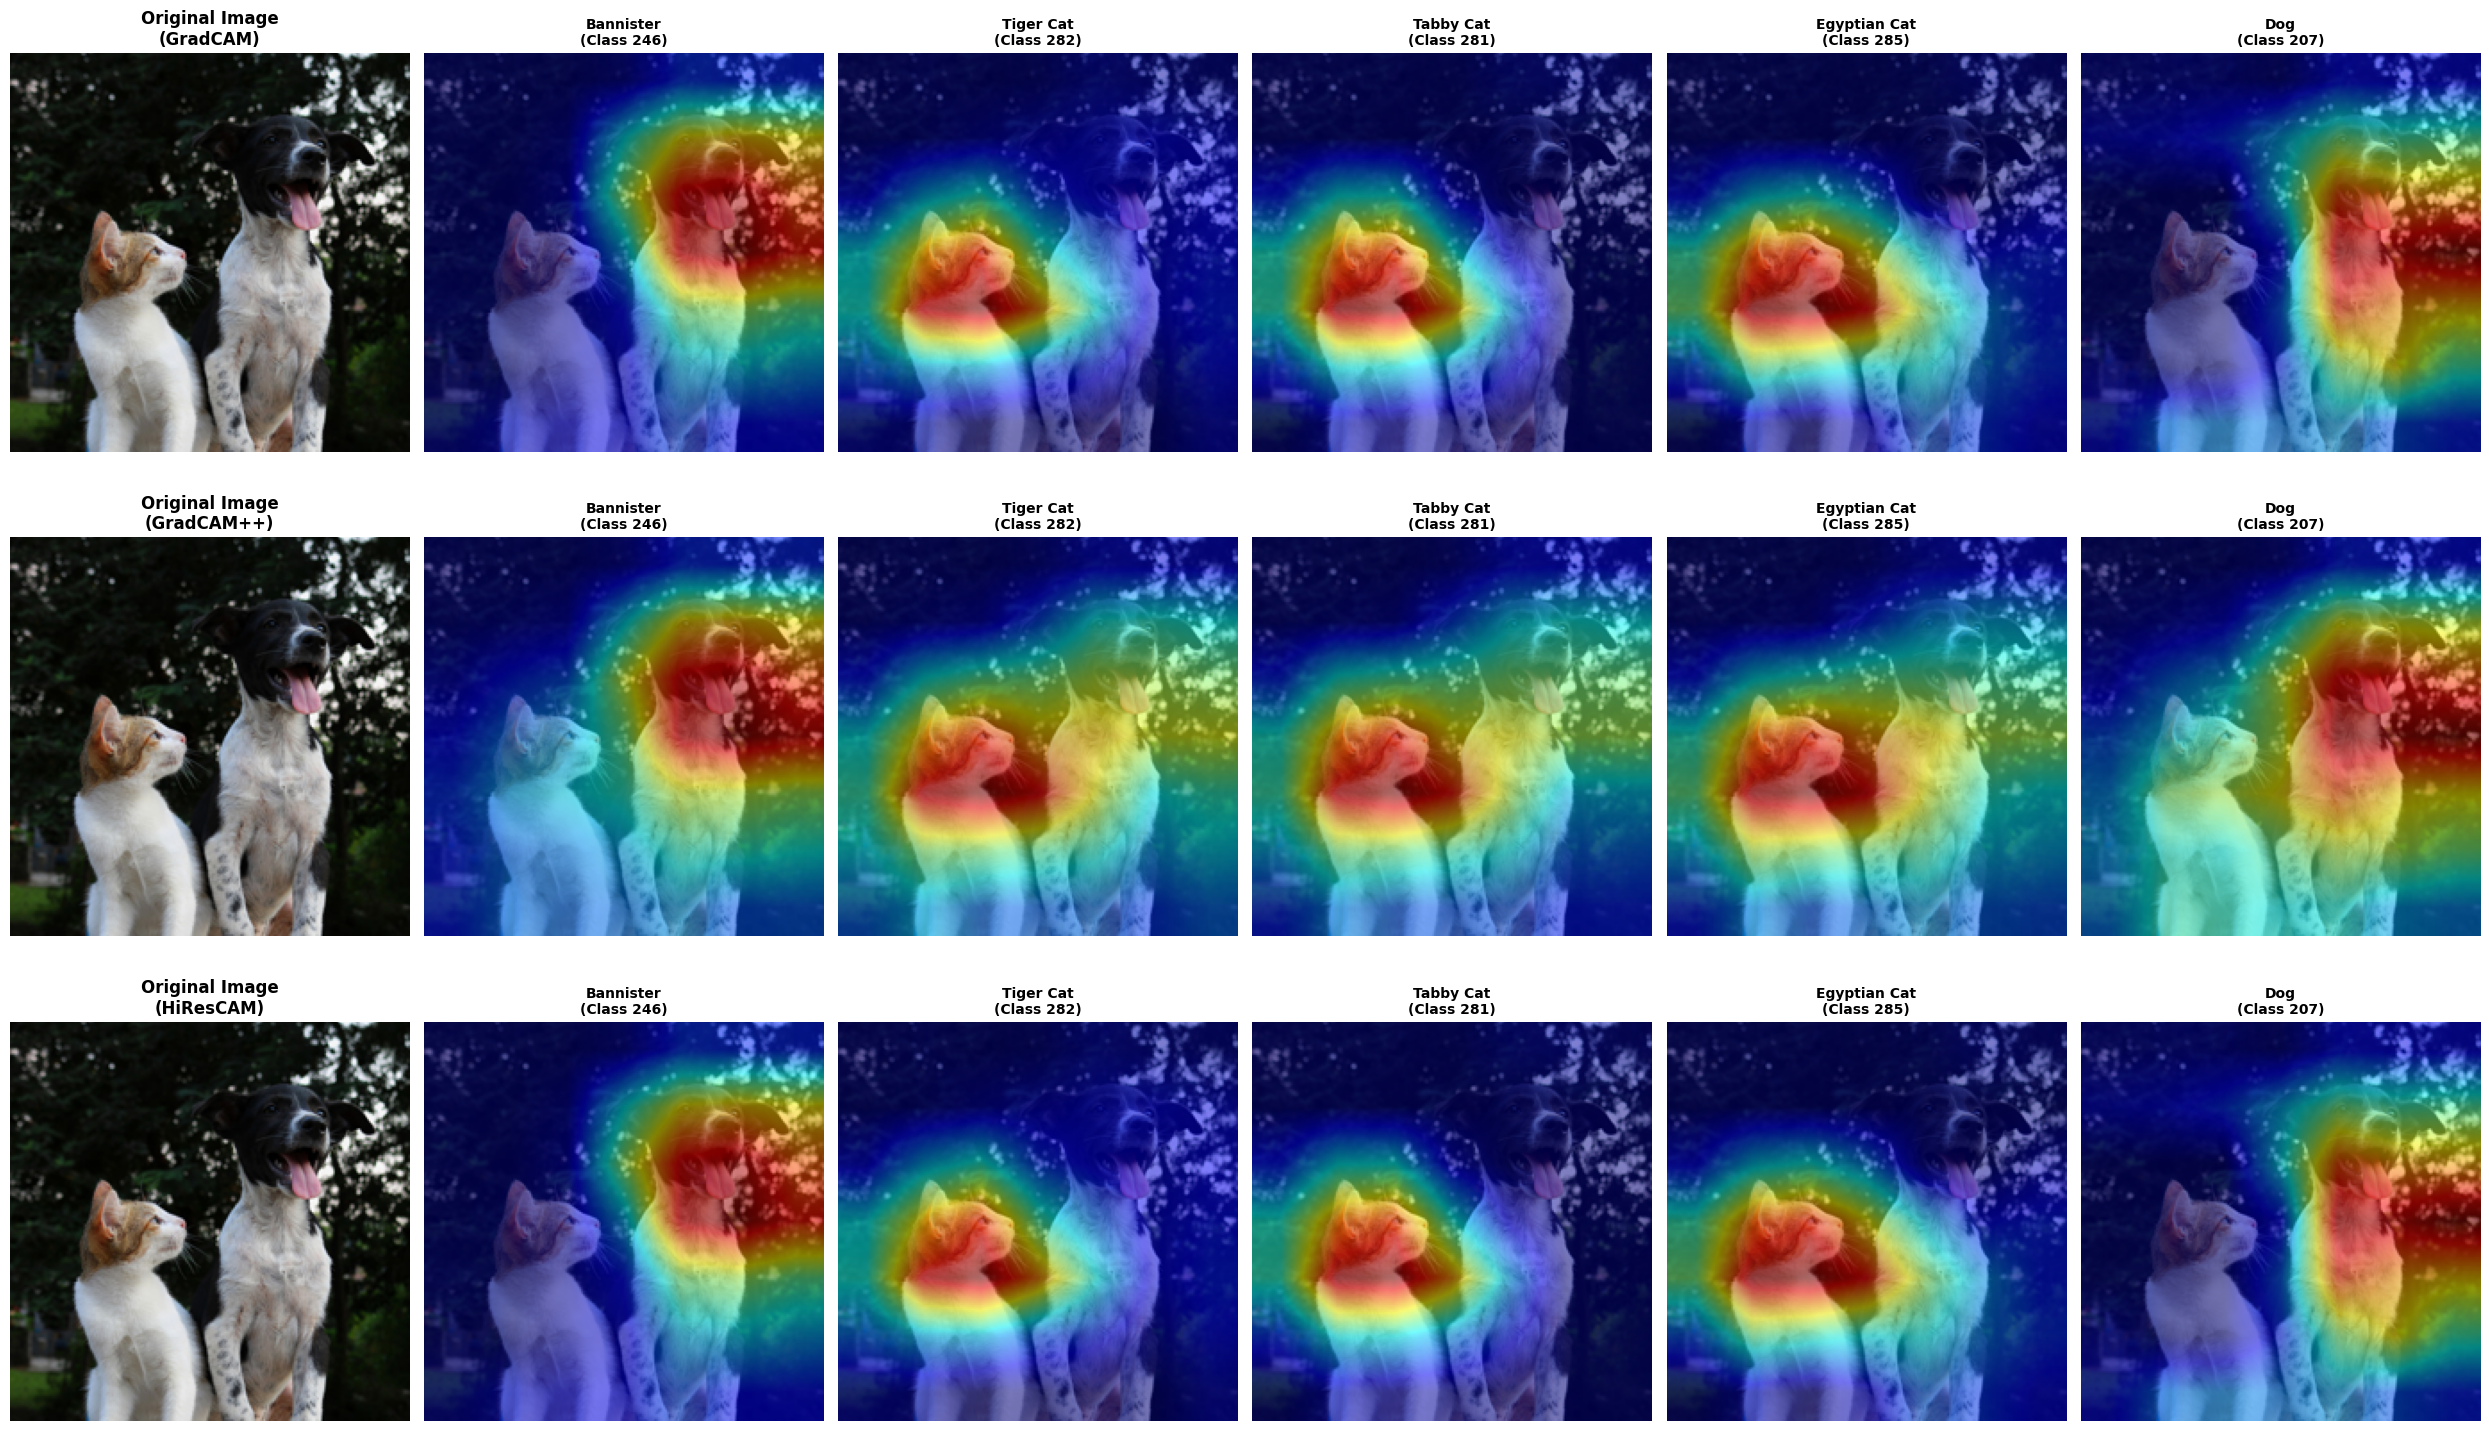

Model Predictions for Each Target Class:
Bannister       (Class 246): 0.308458 (30.8458%)
Tiger Cat       (Class 282): 0.002888 (0.2888%)
Tabby Cat       (Class 281): 0.001201 (0.1201%)
Egyptian Cat    (Class 285): 0.029394 (2.9394%)
Dog             (Class 207): 0.000708 (0.0708%)

Actual predicted class: 246
Highest probability: 0.308458 (30.8458%)

CAM Methods Compared:
Row 1: GradCAM
Row 2: GradCAM++
Row 3: HiResCAM

Classes Compared:
Column 2: Bannister (Class 246)
Column 3: Tiger Cat (Class 282)
Column 4: Tabby Cat (Class 281)
Column 5: Egyptian Cat (Class 285)
Column 6: Dog (Class 207)


In [6]:
# Compare visualizations for different target classes and CAM methods
import matplotlib.pyplot as plt
from torch.nn import functional as F
# Initialize different CAM methods (excluding FinerCAM to avoid context manager issues)
cam_methods = {
    'GradCAM': GradCAM(model=model, target_layers=target_layers),
    'GradCAM++': GradCAMPlusPlus(model=model, target_layers=target_layers),
    'HiResCAM': HiResCAM(model=model, target_layers=target_layers),
}

# Define different target classes (ImageNet class indices)
target_classes = {
    'Bannister': 246,  # Original class you were using
    'Tiger Cat': 282,  # Tiger cat class
    'Tabby Cat': 281,  # Tabby cat class  
    'Egyptian Cat': 285,  # Egyptian cat class
    'Dog': 207,  # Generic dog class
}

# Generate visualizations for each method and each target class
method_class_visualizations = {}

for method_name, cam_instance in cam_methods.items():
    method_class_visualizations[method_name] = {}
    
    with cam_instance:
        for class_name, class_idx in target_classes.items():
            targets_class = [ClassifierOutputTarget(class_idx)]
            grayscale_cam = cam_instance(input_tensor=input_tensor, targets=targets_class)
            grayscale_cam = grayscale_cam[0, :]
            visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
            
            method_class_visualizations[method_name][class_name] = visualization

# Create the visualization grid: Each row = one method, Each column = one class
num_methods = len(cam_methods)
num_classes = len(target_classes)
plt.figure(figsize=(25, 15))

# Display grid: rows = methods, columns = original + classes
for row, (method_name, class_visualizations) in enumerate(method_class_visualizations.items()):
    # First column: Original image for each row
    plt.subplot(num_methods, num_classes + 1, row * (num_classes + 1) + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original Image\n({method_name})', fontsize=12, fontweight='bold')
    plt.axis('off')
    
    # Remaining columns: Class-specific visualizations
    for col, (class_name, visualization) in enumerate(class_visualizations.items(), 2):
        plt.subplot(num_methods, num_classes + 1, row * (num_classes + 1) + col)
        plt.imshow(visualization)
        plt.title(f'{class_name}\n(Class {target_classes[class_name]})', fontsize=10, fontweight='bold')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Show model predictions for each target class
print("Model Predictions for Each Target Class:")
print("=" * 60)
probabilities = F.softmax(model_outputs, dim=1)

for class_name, class_idx in target_classes.items():
    prob = probabilities[0][class_idx].item()
    print(f"{class_name:15} (Class {class_idx:3}): {prob:.6f} ({prob*100:.4f}%)")

print(f"\nActual predicted class: {probabilities[0].argmax().item()}")
print(f"Highest probability: {probabilities[0].max().item():.6f} ({probabilities[0].max().item()*100:.4f}%)")

# Show which CAM methods were used
print(f"\nCAM Methods Compared:")
for i, method_name in enumerate(cam_methods.keys(), 1):
    print(f"Row {i}: {method_name}")
print(f"\nClasses Compared:")
for i, (class_name, class_idx) in enumerate(target_classes.items(), 1):
    print(f"Column {i+1}: {class_name} (Class {class_idx})")

tensor([[8.0305e-06, 6.2871e-05, 1.4069e-05, 1.7535e-04, 1.0726e-03, 2.4472e-04,
         2.2402e-04, 3.6387e-05, 4.5112e-05, 5.2179e-06, 6.7147e-06, 9.2225e-07,
         4.5548e-06, 9.0528e-06, 1.7719e-06, 1.6730e-05, 9.9470e-06, 7.0936e-06,
         8.1924e-06, 1.1934e-06, 9.0313e-05, 5.4583e-06, 8.3738e-06, 4.6040e-05,
         2.6848e-06, 1.1284e-05, 2.4455e-05, 5.0330e-06, 2.9281e-06, 7.6885e-05,
         2.0796e-05, 1.8311e-06, 1.2509e-05, 3.1801e-05, 7.2409e-05, 9.6525e-06,
         1.5455e-04, 8.2354e-06, 1.5658e-04, 1.6964e-05, 2.1127e-05, 1.3361e-05,
         3.7051e-05, 3.6457e-06, 6.5920e-06, 1.5310e-04, 2.3615e-05, 1.2826e-05,
         1.3556e-05, 1.4795e-05, 6.5214e-05, 1.3334e-06, 3.2430e-06, 3.2977e-06,
         1.3047e-05, 2.7078e-06, 1.7726e-06, 2.2247e-06, 7.2119e-04, 4.0539e-06,
         1.4050e-05, 3.8902e-06, 2.4913e-05, 2.0040e-05, 2.1789e-05, 5.0544e-05,
         3.0718e-05, 1.2356e-05, 4.9118e-06, 2.4582e-05, 3.3432e-06, 1.7848e-05,
         6.3355e-06, 9.9723e



# GradCAM: Gradient-weighted Class Activation Mapping

## Introducción al Método GradCAM

**GradCAM (Gradient-weighted Class Activation Mapping)** es una técnica de explicabilidad de redes neuronales convolucionales (CNN) que mejora significativamente el método CAM (Class Activation Mapping) original. Esta metodología permite generar mapas de calor que muestran las regiones de una imagen que fueron más importantes para la predicción de una clase específica.

## Evolución desde CAM hacia GradCAM

### Limitaciones del CAM Original:
- **Restricción arquitectónica**: Requería modificar la arquitectura de la CNN, añadiendo una capa de Global Average Pooling (GAP) seguida de una capa completamente conectada
- **Limitación de aplicabilidad**: Solo funcionaba con arquitecturas específicamente diseñadas para CAM
- **Pérdida de generalidad**: No se podía aplicar a modelos pre-entrenados existentes

### Ventajas de GradCAM:
- **Generalidad**: Funciona con cualquier arquitectura CNN sin modificaciones
- **Flexibilidad**: Se puede aplicar a modelos pre-entrenados
- **Precisión**: Proporciona localizaciones más precisas de las características importantes

## Fundamentos Matemáticos de GradCAM

### 1. Cálculo de los Gradientes

Para una clase objetivo $c$ y una capa convolucional específica, calculamos los gradientes de la puntuación de clase $y^c$ con respecto a los mapas de características $A^k$:

$$\frac{\partial y^c}{\partial A_{i,j}^k}$$

donde:
- $y^c$ es la puntuación para la clase $c$ (antes de softmax)
- $A_{i,j}^k$ es la activación en la posición $(i,j)$ del mapa de características $k$

### 2. Pesos de Importancia por Gradiente Global

Los pesos de importancia $\alpha_k^c$ para cada mapa de características $k$ se calculan mediante la agregación global de los gradientes:

$$\alpha_k^c = \frac{1}{Z} \sum_i \sum_j \frac{\partial y^c}{\partial A_{i,j}^k}$$

donde $Z$ es el número total de píxeles en el mapa de características ($Z = width \times height$).

Esta operación equivale a un **Global Average Pooling** sobre los gradientes, capturando la importancia de cada canal de características para la predicción de la clase $c$.

### 3. Mapa de Localización GradCAM

El mapa de localización GradCAM $L_{GradCAM}^c$ se obtiene mediante la combinación lineal ponderada de los mapas de características, seguida de una función ReLU:

$$L_{GradCAM}^c = ReLU\left(\sum_k \alpha_k^c A^k\right)$$

La función ReLU se aplica porque solo nos interesan las características que tienen una **influencia positiva** en la clase de interés.

### 4. Normalización y Visualización

Finalmente, el mapa se normaliza al rango [0,1] para la visualización:

$$L_{GradCAM}^c = \frac{L_{GradCAM}^c - \min(L_{GradCAM}^c)}{\max(L_{GradCAM}^c) - \min(L_{GradCAM}^c)}$$

## Interpretación Física del Método

1. **Propagación hacia adelante**: La imagen pasa por la CNN hasta generar la predicción
2. **Propagación hacia atrás**: Los gradientes fluyen desde la neurona de clase objetivo hasta la capa convolucional de interés
3. **Agregación espacial**: Los gradientes se promedian espacialmente para obtener la importancia de cada canal
4. **Combinación ponderada**: Los mapas de características se combinan usando estos pesos de importancia
5. **Activación positiva**: Solo se conservan las influencias positivas mediante ReLU

## Ventajas Técnicas de GradCAM

- ✅ **Independiente de la arquitectura**: Funciona con ResNet, VGG, Inception, etc.
- ✅ **Aplicable a modelos existentes**: No requiere reentrenamiento
- ✅ **Computacionalmente eficiente**: Solo requiere una pasada hacia adelante y hacia atrás
- ✅ **Resolución espacial preservada**: Mantiene información de localización espacial
- ✅ **Interpretabilidad intuitiva**: Los mapas de calor son fáciles de interpretar

---

*Este notebook implementa GradCAM usando PyTorch y la biblioteca `pytorch-grad-cam` para analizar modelos de clasificación de imágenes.*